In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



Task: classify if a mushroom is poisend 

In [5]:
df = pd.read_csv("mushrooms.csv")

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Clean the dataset
1. are there any useless or redundant variables?
2. are there any duplicate columns?
3. does the nomenclature make sense?
4. are there any new variables we want to create?

In [10]:
df.duplicated().sum()

0

# Understanding of the variables

In [11]:
df.value_counts(subset="class")

class
e    4208
p    3916
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

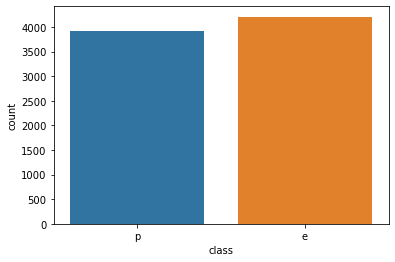

In [12]:
sns.countplot(x= df["class"])

In [13]:
df.value_counts(subset="class", normalize=True)

class
e    0.517971
p    0.482029
dtype: float64

In [14]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Relationship between variables
1. pairplot


# Preparing dataset
1. one hot encoding
2. factorize

In [15]:
df = df.apply(lambda x: pd.factorize(x)[0])
X = df.drop(columns="class")
y = df["class"]



# Logistc Regression

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)


In [17]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter=1000)
logReg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [18]:
y_prob = logReg.predict_proba(X_test)[:,1] # positive class prediction probabilities
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.


In [95]:
from sklearn import metrics

In [96]:
# confusion matrix for performance of the classification model
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 957   13]
 [  16 1045]]


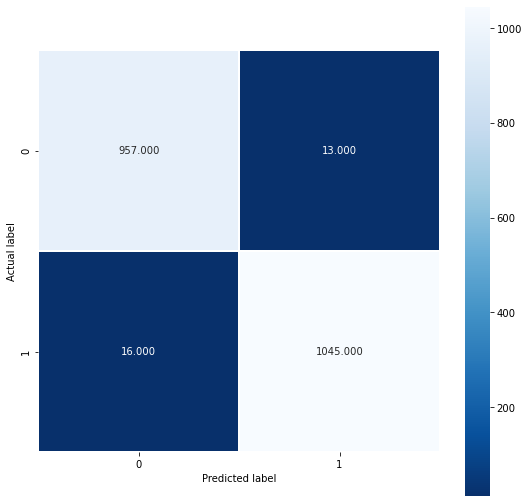

In [97]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(score)


In [98]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.9857589125217409

In [99]:
from sklearn.metrics import roc_curve, auc

false_positive_rate_lr, true_positive_rate_lr, thresholds_lr = roc_curve(y_test, y_prob)
roc_auc_lr = auc(false_positive_rate_lr, true_positive_rate_lr)
roc_auc_lr

0.9992557109126773

Text(0.5, 0, 'False Positive Rate')

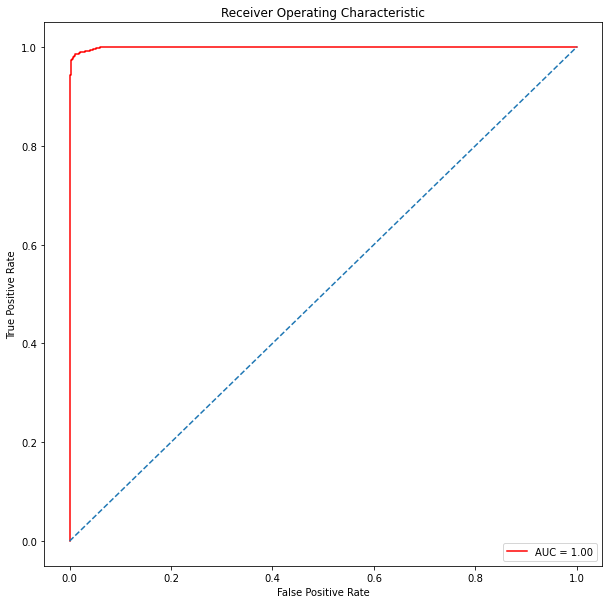

In [100]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_lr,true_positive_rate_lr, color='red',label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Hyperparameter tuning

In [101]:
from sklearn.model_selection import GridSearchCV

logModel = LogisticRegression()

grid = {"C":np.logspace(-4,4,20), 
        "penalty":["l1", "l2", "elasticnet", "none"],
        "solver": ["lbfgs", "newton-cg", "liblinear", "sag", "saga"],
       "max_iter": [100, 1000, 2500, 5000]}
logReg_cv = GridSearchCV(logModel, grid, cv=3, verbose=True, n_jobs=-1)
logReg_cv.fit(X_train, y_train)

print("tuned hyperparameters: (best parameters) ", logReg_cv.best_params_)
print("accuracy: ", logReg_cv.best_score_)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


D:\Programmieren\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.48350566 ...        nan 1.         0.99901526]
  warnings.warn(
D:\Programmieren\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


tuned hyperparameters: (best parameters)  {'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}
accuracy:  1.0


In [102]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [103]:
logReg = LogisticRegression(C=0.0001, max_iter=100, penalty='none', solver='newton-cg')
logReg.fit(X_train, y_train)
y_prob = logReg.predict_proba(X_test)[:,1] # positive class prediction probabilities
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

score = logReg.score(X_test, y_test)
print(score)


1.0


D:\Programmieren\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [104]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

1.0

In [105]:
false_positive_rate_lr_tuned, true_positive_rate_lr_tuned, thresholds_lr_tuned = roc_curve(y_test, y_prob)
roc_auc_lr_tuned = auc(false_positive_rate_lr_tuned, true_positive_rate_lr_tuned)
roc_auc_lr_tuned

1.0

Text(0.5, 0, 'False Positive Rate')

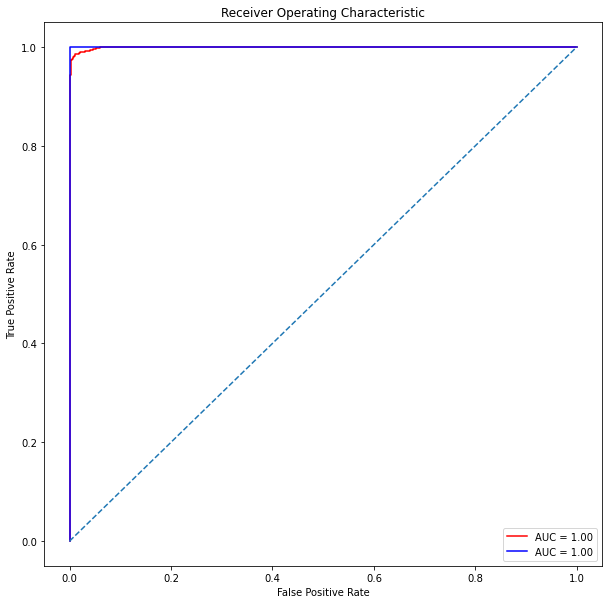

In [107]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_lr,true_positive_rate_lr, color='red',label = 'AUC = %0.2f' % roc_auc_lr)
plt.plot(false_positive_rate_lr_tuned,true_positive_rate_lr_tuned, color='blue',label = 'AUC = %0.2f' % roc_auc_lr_tuned)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Support Vector Machine

In [109]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_prob = clf.predict_proba(X_test)[:,1] # positive class prediction probabilities
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.


In [110]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9980305268340719


In [112]:
false_positive_rate_SVM, true_positive_rate_SVM, thresholds_SVM = roc_curve(y_test, y_prob)
roc_auc_SVM = auc(false_positive_rate_SVM, true_positive_rate_SVM)

In [24]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.5s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   2.1s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   2.1s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   2.1s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   2.1s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [25]:

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# print best accuracy score
print(grid.best_score_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)
1.0


In [113]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf',C=1, gamma=0.1, probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_prob = clf.predict_proba(X_test)[:,1] # positive class prediction probabilities
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

In [114]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [115]:
false_positive_rate_SVM_tuned, true_positive_rate_SVM_tuned, thresholds_SVM_tuned = roc_curve(y_test, y_prob)
roc_auc_SVM_tuned = auc(false_positive_rate_SVM_tuned, true_positive_rate_SVM_tuned)

Text(0.5, 0, 'False Positive Rate')

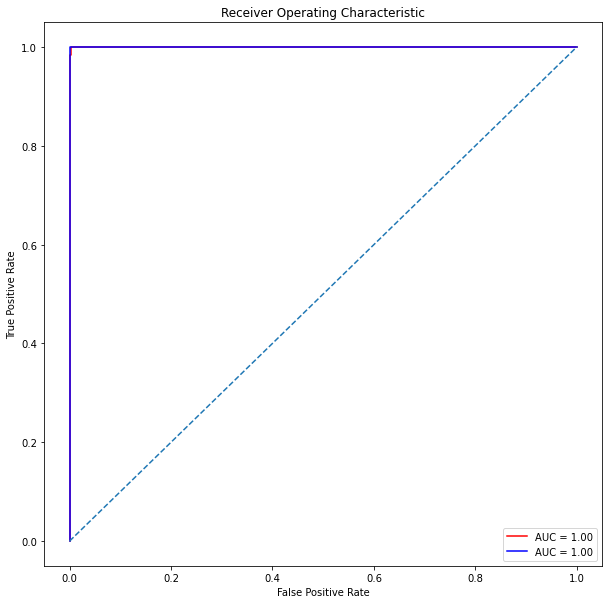

In [118]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_SVM,true_positive_rate_SVM, color='red',label = 'AUC = %0.2f' % roc_auc_SVM)
plt.plot(false_positive_rate_SVM_tuned,true_positive_rate_SVM_tuned, color='blue',label = 'AUC = %0.2f' % roc_auc_SVM_tuned)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')